# PROJECT- 4 APPLICATION OF CLUSTERING MODELS
 This assignment will help you to consolidate the concepts learnt in the session.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/Data Science Course_Numan/Session-31_PROJECT- 4 APPLICATION OF CLUSTERING MODELS/data_stocks.csv')

In [3]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='s')

In [5]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
data.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: datetime64[ns](1), float64(501)
memory usage: 158.0 MB


In [8]:
data.shape

(41266, 502)

In [9]:
pca = PCA(n_components=0.95)

In [10]:
data_ = data.iloc[:, 1:]
data_.head(5)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
data_pca = pca.fit_transform(data_)

In [12]:
data_pca.shape

(41266, 5)

In [13]:
scaler = StandardScaler()

In [14]:
data_std = scaler.fit_transform(data_)

In [15]:
stock_df = pd.DataFrame(data = data_std, columns=data_.columns)

In [16]:
stock_df.head(5)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-1.464426,-1.650134,-1.086073,-1.689824,1.296396,-0.282628,-1.893421,1.834067,-0.129860,-1.756952,...,-2.507925,1.347687,-1.501169,-1.845414,0.676495,-1.021763,-1.225651,-1.955784,0.102815,-2.041884
1,-1.452038,-1.640930,-1.082866,-1.590065,1.316393,-0.302970,-1.847626,1.850617,-0.133415,-1.748783,...,-2.507925,1.347687,-1.693422,-1.845414,0.676495,-1.020051,-1.225651,-1.985500,0.061795,-2.041884
2,-1.487941,-1.656271,-1.084454,-1.603800,1.291396,-0.286583,-1.862536,1.841308,-0.093421,-1.789624,...,-2.468197,1.368901,-1.706681,-1.787088,0.671063,-1.021763,-1.254010,-1.983023,0.049311,-2.037402
3,-1.446730,-1.637862,-1.092487,-1.625790,1.276398,-0.302970,-1.864964,1.805105,-0.136969,-1.818212,...,-2.491295,1.368901,-1.600610,-1.781256,0.671063,-1.022618,-1.242667,-1.950831,0.049311,-2.032921
4,-1.433078,-1.586379,-1.089280,-1.653679,1.293896,-0.321053,-1.842291,1.805105,-0.122750,-1.781456,...,-2.489447,1.401899,-1.693422,-1.798753,0.676495,-1.021763,-1.231323,-1.943402,0.048419,-2.074751


In [17]:
pca = PCA(n_components=0.95)

In [18]:
stock_pca = pca.fit_transform(stock_df)

In [19]:
stock_pca.shape

(41266, 14)

In [20]:
stock_pca

array([[ 25.59509485,   9.9807717 ,  -9.3983565 , ...,  -0.58416216,
         -2.7232801 ,   0.26988949],
       [ 25.69257356,   9.86717585,  -9.81875811, ...,  -0.57446838,
         -3.01848702,   0.13153311],
       [ 25.60957179,   9.80054524,  -9.6915261 , ...,  -0.67881892,
         -2.92240793,   0.15459468],
       ...,
       [-22.79025538,  13.34723139,   6.56078691, ...,  -1.51460008,
          0.45323653,  -1.33893635],
       [-22.63689317,  13.43719808,   6.67343269, ...,  -1.54366672,
          0.47544815,  -1.39851974],
       [-22.74487836,  13.3819194 ,   6.60207627, ...,  -1.51710965,
          0.43572203,  -1.36078039]])

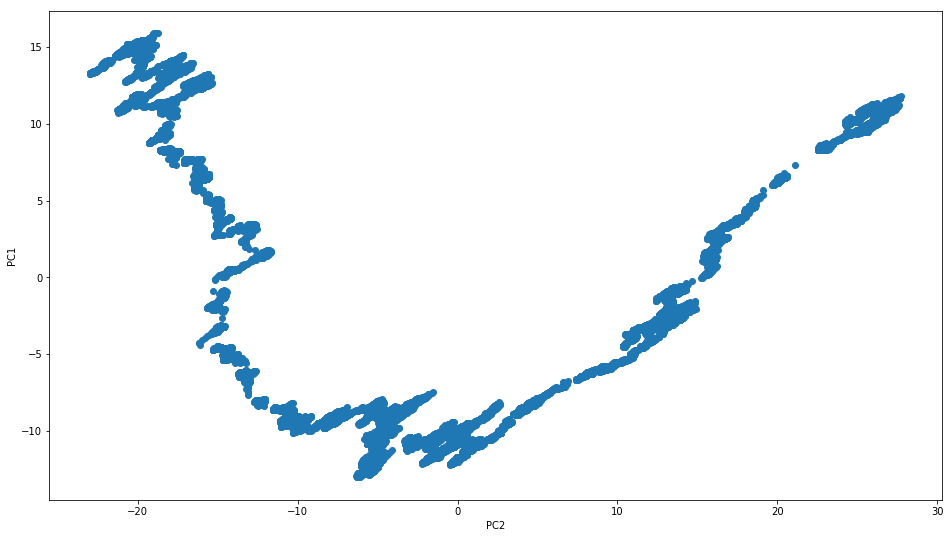

In [21]:
plt.figure(figsize=(16,9))
plt.scatter(stock_pca[:,0],stock_pca[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

Text(0.5,1,'Elbow curve')

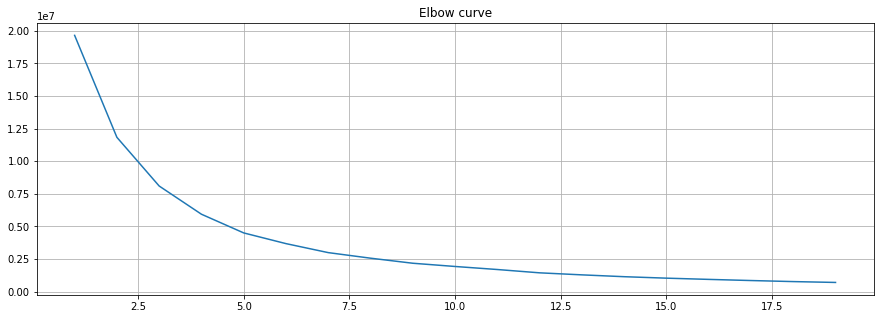

In [22]:
inertia = []
for k in range(1, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(stock_pca)
    inertia.append(k_means.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), inertia)
plt.grid(True)
plt.title('Elbow curve')

# Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

In [23]:
k_means = KMeans(n_clusters=6,random_state=0,init='k-means++')
k_means.fit(stock_pca)
y_kmeans = k_means.fit_predict(stock_pca)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
y_kmeans.shape

(41266,)

In [25]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

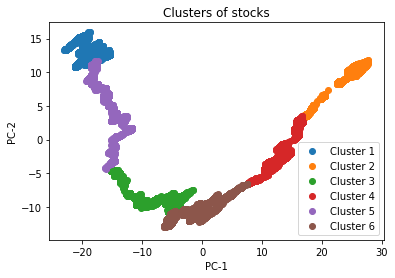

In [26]:
plt.scatter(stock_pca[y_kmeans == 0, 0], stock_pca[y_kmeans == 0, 1], label = 'Cluster 1')
plt.scatter(stock_pca[y_kmeans == 1, 0], stock_pca[y_kmeans == 1, 1], label = 'Cluster 2')
plt.scatter(stock_pca[y_kmeans == 2, 0], stock_pca[y_kmeans == 2, 1], label = 'Cluster 3')
plt.scatter(stock_pca[y_kmeans == 3, 0], stock_pca[y_kmeans == 3, 1], label = 'Cluster 4')
plt.scatter(stock_pca[y_kmeans == 4, 0], stock_pca[y_kmeans == 4, 1], label = 'Cluster 5')
plt.scatter(stock_pca[y_kmeans == 5, 0], stock_pca[y_kmeans == 5, 1], label = 'Cluster 6')

plt.title('Clusters of stocks')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()

The clusters grouped together in the above chart show the stocks that perform similarly.

# Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

In [27]:
stock_comp = pd.DataFrame(pca.components_,columns=stock_df.columns)
stock_comp.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.061147,-0.039240,-0.040966,-0.062790,-0.009795,-0.035806,-0.054582,0.050252,-0.035304,-0.044019,...,-0.049370,0.056909,-0.054502,-0.050550,0.047054,-0.057781,-0.061261,-0.062367,0.002464,-0.051631
1,-0.017750,-0.064233,0.033945,0.001972,-0.032422,0.043522,-0.029407,0.016056,0.058312,-0.052582,...,-0.058860,0.030177,0.013762,-0.040697,-0.052898,0.010326,0.031561,-0.020285,-0.081257,-0.059389
2,-0.013689,-0.039764,0.064157,0.012143,0.043281,-0.037258,0.040575,-0.053960,-0.051097,0.030806,...,-0.003134,0.022022,0.059654,-0.034496,-0.028738,-0.038998,-0.004301,0.021094,-0.066303,0.023674
3,0.011871,0.007577,0.077207,0.008521,-0.027793,-0.017217,0.009008,-0.032168,0.034345,0.051562,...,0.021719,0.060973,-0.039576,0.027645,0.012222,-0.039697,0.002869,-0.002750,-0.049439,0.015092
4,-0.054526,-0.032853,-0.016773,0.002612,-0.038413,-0.101719,-0.034526,-0.011505,0.037651,-0.039302,...,-0.036308,-0.011556,-0.030297,-0.011577,-0.045701,0.029347,-0.002838,-0.001114,-0.003635,0.005651


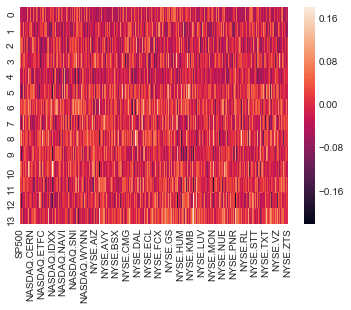

In [28]:
sns.set_style('whitegrid')
sns.heatmap(stock_comp)

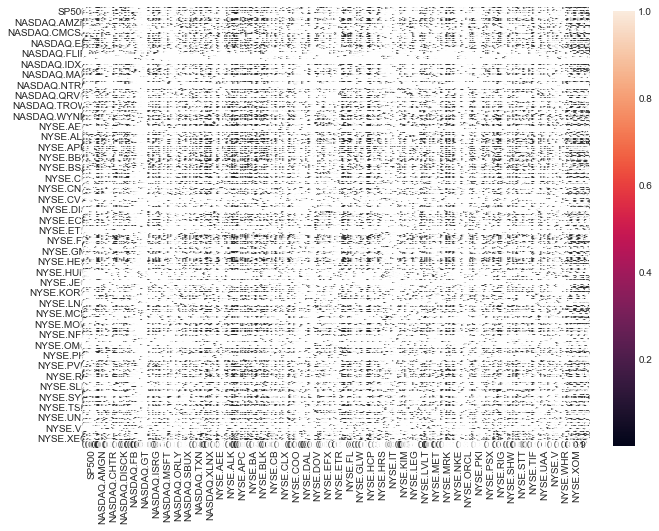

In [29]:
plt.figure(figsize=(11,8))
df_corr = data_.corr().abs()
sns.heatmap(df_corr,annot=True)

# Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [30]:
stock_df['Cluster_ID'] = labels

In [31]:
for i in stock_df['Cluster_ID'].unique().tolist():
    count = stock_df[stock_df['Cluster_ID'] == i].shape[0]
    print('For lablel {}: The number of stock with similar performances is: {} '.format(i,count))

For lablel 1: The number of stock with similar performances is: 6647 
For lablel 3: The number of stock with similar performances is: 7807 
For lablel 5: The number of stock with similar performances is: 8726 
For lablel 2: The number of stock with similar performances is: 7138 
For lablel 4: The number of stock with similar performances is: 4698 
For lablel 0: The number of stock with similar performances is: 6250 


The above output shows the stocks that move together.

End of Project